**Reference Link:** [Building your First AI Agent with LangGraph (Analytics Vidhya)](https://courses.analyticsvidhya.com/courses/take/building-your-first-ai-agent-with-langgraph/assignments/60490544-project-creating-a-conversational-ai)

LangGraph models stuff as graphs right?

So let's recall the basics:

1. Nodes - python functions
2. Edges - routing logic
3. State - shared data structure that evolves over time

### Initial Imports

In [22]:
from typing import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.state import END

### Define Initial State

In [23]:
class State(TypedDict):
    attribute1 : str
    attribute2 : str

### Define Sample Function to be used as Nodes in the Graph

In [24]:
def node1(state: State) -> State:
    state['attribute1'] = "Values Changed in node1"
    print(f"State after node1 is {state}")
    return state

def node2(state: State) -> State:
    state['attribute2'] = "Values Changed in node2"
    print(f"State after node2 is {state}")
    return state

### Create the Graph

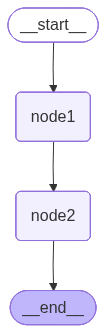

In [25]:
# Initialize the Graph
graph = StateGraph(State)

# Add Nodes in the Graph
graph.add_node('node1',node1)
graph.add_node('node2',node2)

# Add Edges in the Graph
graph.add_edge('node1','node2')
graph.add_edge('node2',END)

# Set Entry Point to the Graph
graph.set_entry_point('node1')

# Compile the Graph
compiled_graph = graph.compile()

# Display the Graph
from IPython.display import Image   
Image(compiled_graph.get_graph().draw_mermaid_png())

### Invoke the Graph

In [26]:
result = compiled_graph.invoke({"attribute1": "Initial value of Attribute1",
                       "attribute2": "Initial value of Attribute2"})

State after node1 is {'attribute1': 'Values Changed in node1', 'attribute2': 'Initial value of Attribute2'}
State after node2 is {'attribute1': 'Values Changed in node1', 'attribute2': 'Values Changed in node2'}
